In [1]:
import numpy as np
import matplotlib.pyplot as plt

In polar coordinates, the feed beam can written as 

$g(r) = exp(-r^2/2\sigma^2)$

Fraction of the beam that stays within the dish is:

$\eta = \large \frac{\int_0^R g(r) 2\pi r dr}{\int_0^\infty g(r) 2\pi r dr} = 1 - exp(-R^2/2\sigma^2)$

Feed beam is the amplitude of response to different parts of the dish. Since area of a dish is calculated simply as $\int 2 \pi r dr$, if we include the feed beam, it simply acts as a modulating factor giving us the effective area of the dish. Thus to obtain an answer in units of area, we can simply dispense with the normalization factor above, such that:

$A_{e} =  \int_0^R g(r) 2\pi r dr = (1 - exp(-R^2/2\sigma^2))2 \pi \sigma^2$

We want to maximize the response of the feed while making sure that most of the feed beam stays within the dish. Therefore, it is convinient to maximize:

$f(\sigma) = \eta(\sigma) A_e(\sigma)$


Max feed beam sigma is 0.63, fraction of feed beam within dish is 0.72, and max Ae/A at that point is 0.57


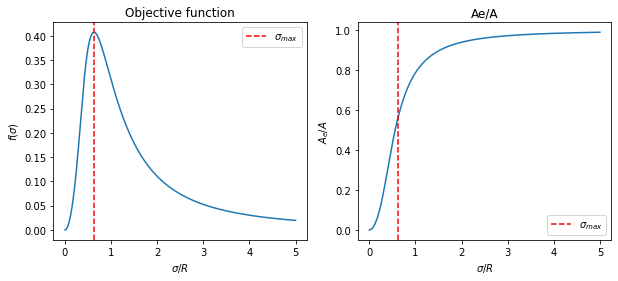

In [86]:
#in units of R=1

x=np.linspace(1e-3,5,1001) #This is sigma/R or sigma since R=1
eta=(1-np.exp(-1/(2*x**2))) # fraction of beam inside the dish
Ae=(1-np.exp(-1/(2*x**2)))*(x**2)*2 # Ae / A (R=1 and pi cancels out)
f=Ae*eta
idmax=np.argmax(f)
xmax=x[idmax]
fig=plt.gcf()
fig.set_size_inches(10,4)
plt.subplot(121)
plt.plot(x,f)
plt.xlabel(r"$\sigma/R$")
plt.ylabel(r"$f(\sigma)$")
plt.axvline(xmax,c='r',ls='--',label=r"$ \sigma_{max}$")
plt.legend()
plt.title("Objective function")
plt.subplot(122)
plt.plot(x,Ae)
plt.xlabel(r"$\sigma/R$")
plt.ylabel(r"$A_e/A$")
plt.axvline(xmax,c='r',ls='--',label=r"$ \sigma_{max}$")
plt.legend()
plt.title("Ae/A")
print(f"Max feed beam sigma is {xmax:4.2f}, fraction of feed beam within dish is {eta[idmax]:4.2f}, and max Ae/A at that point is {Ae[idmax]:4.2f}")
# plt.xlim(0,2)

In [93]:
0.28*2*0.63**2 # % of area off the dish

0.22226400000000004

Note that as expected Ae/A approaches 1 (whole dish contributes equally to area) as sigma becomes larger and larger = near uniform illumination over the dish.

Since the total temperature seen the by the feed (not the dish but the feed) is $\int_{4\pi} I \otimes B_n d^2\Omega$ (where $I$ is the total intensity, $B_n$ is the normalized beam of the feed, and $\otimes$ is convolution operator.) If fraction $f$ of the beam ends up outside the solid angle of the dish, it will contribute a fraction $f$ to feed temperature. 

Fraction of feed beam off the dish ~ 28%. Therefore, T_sys = 0.28 x 300 =  84 K. That's roughly 4x of the nominal feed temperature of 20-25 K.

In [1]:
0.28*300

84.00000000000001